In [509]:
import xarray as xr
import inspect
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.util as cutil
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

year = 1948 # ファイルから読み取る等別途検討
month = [1,2,3,4,5,6,7,8,9,10,11,12]

ncfile = '01_ESTOC_ForcingData/NCEP_NCAR_Forcing/NCEP/dlwrf.sfc.gauss.1948.nc' # 読み取り別途検討
data = xr.open_dataset(ncfile)['dlwrf']

print (data)

<xarray.DataArray 'dlwrf' (time: 366, lat: 94, lon: 192)>
[6605568 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 88.54 86.65 84.75 82.85 ... -84.75 -86.65 -88.54
  * lon      (lon) float32 0.0 1.875 3.75 5.625 7.5 ... 352.5 354.4 356.2 358.1
  * time     (time) datetime64[ns] 1948-01-01 1948-01-02 ... 1948-12-31
Attributes:
    long_name:     mean Daily Downward Longwave Radiation Flux at surface
    units:         W/m^2
    precision:     1
    GRIB_id:       205
    GRIB_name:     DLWRF
    var_desc:      Downward Longwave Radiation Flux
    dataset:       NCEP Reanalysis Daily Averages
    level_desc:    Surface
    statistic:     Mean
    parent_stat:   Individual Obs
    actual_range:  [ -2.6000977 475.19995  ]
    valid_range:   [-100.  600.]


In [510]:
data_mean_10dy = data.loc['1948-1-1':'1948-1-10'].mean(dim='time')
!print(data_mean_10dy)

<xarray.DataArray 'dlwrf' (lat: 94, lon: 192)>
array([[131.87997, 130.91997, 130.20999, ..., 134.32999, 133.46997,
        132.59998],
       [140.59998, 140.82999, 140.91997, ..., 139.85999, 140.23999,
        140.54997],
       [149.02998, 149.99997, 151.13997, ..., 145.32999, 146.71997,
        147.98996],
       ...,
       [156.58997, 159.90996, 163.95999, ..., 146.85999, 149.87997,
        153.22998],
       [155.08997, 156.80998, 159.82999, ..., 149.19998, 150.92998,
        152.94998],
       [156.28996, 156.17998, 157.06998, ..., 155.32999, 155.63998,
        155.84   ]], dtype=float32)
Coordinates:
  * lat      (lat) float32 88.54 86.65 84.75 82.85 ... -84.75 -86.65 -88.54
  * lon      (lon) float32 0.0 1.875 3.75 5.625 7.5 ... 352.5 354.4 356.2 358.1


In [512]:
for x in month:
    # 範囲指定用の文字列構成
    start1 = str(year) + '-' + str(x) + '-1'
    end1 = str(year) + '-' + str(x) + '-10'
    start2 = str(year) + '-' + str(x) + '-11'
    end2 = str(year) + '-' + str(x) + '-20'
    start3 = str(year) + '-' + str(x) + '-21'
    
    if x == 12:
        nextmonth = 1
        lastday = str(year+1) + '-' + str(nextmonth) + '-1'
    else:
        nextmonth = x + 1
        lastday = str(year) + '-' + str(nextmonth) + '-1'

    end3 = datetime.datetime.strptime(lastday,'%Y-%m-%d') - datetime.timedelta(days = 1)
    end3 = end3.strftime('%Y-%m-%d')
    # print(end3)
    data_mean_10dy1 = data.loc[start1:end1].mean(dim='time')
    data_mean_10dy2 = data.loc[start2:end2].mean(dim='time')
    data_mean_10dy3 = data.loc[start3:end3].mean(dim='time')

print(data_mean_10dy1)


<xarray.DataArray 'dlwrf' (lat: 94, lon: 192)>
array([[139.80998, 138.62997, 137.31998, ..., 143.52998, 142.14998,
        140.88998],
       [148.56998, 148.11996, 147.95999, ..., 149.07999, 148.90996,
        148.90999],
       [157.37997, 157.57999, 158.37997, ..., 154.81998, 155.79997,
        156.69998],
       ...,
       [135.51997, 140.76997, 147.43999, ..., 122.76997, 126.51997,
        130.85999],
       [146.34998, 148.52995, 152.33997, ..., 140.98996, 142.66997,
        144.52998],
       [156.98996, 155.98996, 155.95999, ..., 160.78996, 160.00998,
        158.72998]], dtype=float32)
Coordinates:
  * lat      (lat) float32 88.54 86.65 84.75 82.85 ... -84.75 -86.65 -88.54
  * lon      (lon) float32 0.0 1.875 3.75 5.625 7.5 ... 352.5 354.4 356.2 358.1


In [422]:
# datatimeindexを使って月とか週、曜日でも平均取れる
key = data['time'].dt.month
data.groupby(key).mean(dim='time')

<xarray.DataArray 'dlwrf' (month: 12, lat: 94, lon: 192)>
array([[[128.58063 , 127.903206, 127.01288 , ..., 131.8387  ,
         130.62578 , 129.56772 ],
        [141.53548 , 141.75482 , 141.97093 , ..., 140.45158 ,
         140.73547 , 141.09674 ],
        [154.44194 , 155.50322 , 156.83546 , ..., 149.43549 ,
         150.97096 , 152.68385 ],
        ...,
        [144.56448 , 148.68709 , 153.51613 , ..., 134.529   ,
         137.51935 , 140.92902 ],
        [148.3774  , 150.12582 , 152.82579 , ..., 142.29675 ,
         144.12257 , 146.14838 ],
        [153.51291 , 152.4129  , 152.17418 , ..., 152.07094 ,
         152.58064 , 153.02583 ]],

       [[137.84134 , 137.8655  , 137.71721 , ..., 139.04135 ,
         138.67929 , 138.3517  ],
        [143.71376 , 144.33792 , 144.89308 , ..., 142.09308 ,
         142.7172  , 143.32066 ],
        [150.12756 , 151.14137 , 152.22757 , ..., 145.99306 ,
         147.49654 , 148.86551 ],
...
        [ 94.5833  ,  99.28331 , 104.63997 , ...,  82.43997 ,
          86.01997 ,  90.146645],
        [ 98.903305, 101.04331 , 103.64664 , ...,  92.90664 ,
          94.723305,  96.756645],
        [104.326645, 103.50331 , 102.70997 , ..., 105.2833  ,
         104.98664 , 104.66663 ]],

       [[119.225784, 118.16127 , 117.087074, ..., 122.33223 ,
         121.37094 , 120.3774  ],
        [129.11932 , 128.8161  , 128.49675 , ..., 130.08708 ,
         129.68707 , 129.44514 ],
        [140.27095 , 140.59032 , 140.8903  , ..., 138.98062 ,
         139.21933 , 139.6645  ],
        ...,
        [134.82256 , 139.34834 , 144.67738 , ..., 124.64191 ,
         127.69353 , 131.07094 ],
        [148.3903  , 150.67418 , 154.13545 , ..., 143.94836 ,
         145.24837 , 146.7516  ],
        [163.32259 , 163.20322 , 164.30324 , ..., 165.28708 ,
         164.65163 , 163.99033 ]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 88.54 86.65 84.75 82.85 ... -84.75 -86.65 -88.54
  * lon      (lon) float32 0.0 1.875 3.75 5.625 7.5 ... 352.5 354.4 356.2 358.1
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

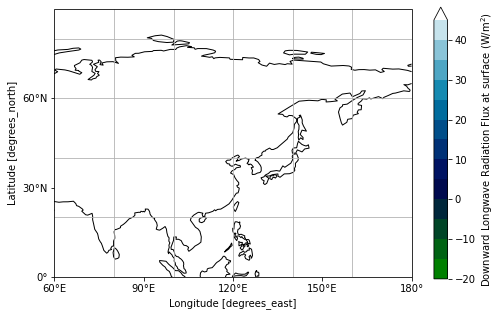

In [430]:
clevels = np.arange(-20,50,5) # 塗りつぶし用

# 描画
fig = plt.figure(figsize=(8,5))

# PlateCaree: 正距円筒図法, central_longitude: 図の中心の経度
ax = fig.add_subplot(111,projection=ccrs.PlateCarree(central_longitude=180))

# (2) 図を描く
data_mean_10dy.plot.contourf(ax=ax,transform=ccrs.PlateCarree(),levels=clevels,cmap='ocean',cbar_kwargs={'label':'Downward Longwave Radiation Flux at surface (W/m$^{2}$)'})
# transform = にはデータ自身の座標系を指定する; 大抵の場合ccrs.PlateCarree()としておけば問題ない

# (3) 目盛り
xticks = np.arange(13)*30
yticks = -90 + np.arange(7)*30
ax.set_xticks(xticks,crs=ccrs.PlateCarree())
ax.set_yticks(yticks,crs=ccrs.PlateCarree())
##　地図投影用の書式を設定
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)


# (4) 描画領域の設定
ax.set_extent([60,180,0,210],crs=ccrs.PlateCarree())


# (5) オプション
ax.coastlines() #海岸線
ax.gridlines(draw_labels=False) #罫線：ラベルはすでに上で描いたので"False"

plt.show()

In [337]:
print(nc['dlwrf'][0,0,0])

<xarray.DataArray 'dlwrf' ()>
array(93.199951)
Coordinates:
    lat      float32 88.54
    lon      float32 0.0
    time     datetime64[ns] 1948-01-01
Attributes:
    long_name:     mean Daily Downward Longwave Radiation Flux at surface
    units:         W/m^2
    precision:     1
    GRIB_id:       205
    GRIB_name:     DLWRF
    var_desc:      Downward Longwave Radiation Flux
    dataset:       NCEP Reanalysis Daily Averages
    level_desc:    Surface
    statistic:     Mean
    parent_stat:   Individual Obs
    actual_range:  [ -2.6000977 475.19995  ]
    valid_range:   [-100.  600.]


In [338]:
print(nc['dlwrf'][0])

<xarray.DataArray 'dlwrf' (lat: 94, lon: 192)>
array([[ 93.19995,  92.69995,  92.5    , ...,  94.     ,  93.69995,  93.5    ],
       [101.     , 102.     , 102.19995, ..., 100.19995, 100.5    , 100.69995],
       [108.5    , 110.19995, 111.69995, ..., 106.19995, 106.69995, 107.69995],
       ...,
       [136.19995, 140.69995, 145.     , ..., 128.19995, 130.69995, 133.5    ],
       [136.5    , 138.5    , 141.     , ..., 132.     , 133.19995, 135.     ],
       [136.69995, 136.5    , 136.5    , ..., 136.5    , 136.69995, 136.5    ]],
      dtype=float32)
Coordinates:
  * lat      (lat) float32 88.54 86.65 84.75 82.85 ... -84.75 -86.65 -88.54
  * lon      (lon) float32 0.0 1.875 3.75 5.625 7.5 ... 352.5 354.4 356.2 358.1
    time     datetime64[ns] 1948-01-01
Attributes:
    long_name:     mean Daily Downward Longwave Radiation Flux at surface
    units:         W/m^2
    precision:     1
    GRIB_id:       205
    GRIB_name:     DLWRF
    var_desc:      Downward Longwave Radiation Flux

In [339]:
print(nc['dlwrf'][0,0,0])

<xarray.DataArray 'dlwrf' ()>
array(93.199951)
Coordinates:
    lat      float32 88.54
    lon      float32 0.0
    time     datetime64[ns] 1948-01-01
Attributes:
    long_name:     mean Daily Downward Longwave Radiation Flux at surface
    units:         W/m^2
    precision:     1
    GRIB_id:       205
    GRIB_name:     DLWRF
    var_desc:      Downward Longwave Radiation Flux
    dataset:       NCEP Reanalysis Daily Averages
    level_desc:    Surface
    statistic:     Mean
    parent_stat:   Individual Obs
    actual_range:  [ -2.6000977 475.19995  ]
    valid_range:   [-100.  600.]


In [353]:
ncfile = '01_ESTOC_ForcingData/NCEP_NCAR_Forcing/NCEP/dlwrf.sfc.gauss.1949.nc'
nc2 = xr.open_dataset(ncfile)
print(nc2)

<xarray.Dataset>
Dimensions:  (lat: 94, lon: 192, time: 365)
Coordinates:
  * lat      (lat) float32 88.54 86.65 84.75 82.85 ... -84.75 -86.65 -88.54
  * lon      (lon) float32 0.0 1.875 3.75 5.625 7.5 ... 352.5 354.4 356.2 358.1
  * time     (time) datetime64[ns] 1949-01-01 1949-01-02 ... 1949-12-31
Data variables:
    dlwrf    (time, lat, lon) float32 ...
Attributes:
    Conventions:    COARDS
    title:          mean daily NMC reanalysis (1949)
    description:    Data is from NMC initialized reanalysis\n(4x/day).  It co...
    platform:       Model
    history:        created 99/05/29 by Hoop (netCDF2.3)\nConverted to chunke...
    References:     http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reana...
    dataset_title:  NCEP-NCAR Reanalysis 1


In [354]:
hoge = nc['dlwrf'].values
hoge2 = nc2['dlwrf'].values
print(hoge.shape)
print(hoge2.shape)
hoa = np.vstack([hoge,hoge2])
print(hoa.shape)

TypeError: string indices must be integers

In [355]:
from_dt = datetime.date(1948,1,1)
to_dt = datetime.date(1948,1,10)

for nc2 in nc2:
    if from_dt <= nc2['time'] <= to_dt:
        print(nc['time'])
    

TypeError: string indices must be integers

In [358]:
nc.sel(time='1948-1-10')

AttributeError: 'str' object has no attribute 'sel'